# Complexity of Matrix Operations

We will implement different matrix operations by hand, test the implementation and compare the speed with the optimized numpy library. We will also study the computational complexity of these matrix operations, and estimate the performance of our computer.

## Implementation of Matrix Operations (6 points)

Implement the matrix operations $\mathbf{{x}}^T\mathbf{{x}}$, $\mathbf{{A}}\mathbf{{x}}$, $\mathbf{{A}}\mathbf{{A}}$ and $\mathbf{{x}}^T\mathbf{{A}}\mathbf{{x}}$ in Python without using the numpy package. Verify your implementation. 

In [5]:
import time
import typing
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def dot(x, y):
    return sum([i * j for (i,j) in zip(x,y)])

def x_dot_x(x):
    return dot(x, x)

In [7]:
assert( x_dot_x( [1,2] ) == 5)

In [9]:
def A_dot_x (A, x):
    return [dot(a,x) for a, i in zip(A,x)]

In [10]:
assert( A_dot_x( [ [1,2], [2,1] ], [0,1] ) == [2,1] )

In [11]:
def A_dot_A (A):
    A2 = []
    for i in range(len(A)):
        a = []
        for j in range(len(A)):
            col = [A[a][j] for a in range(len(A))]
            a.append(dot(col, A[i]))
        A2.append(a)
    return A2

In [12]:
assert( A_dot_A( [ [1,1], [2,0] ] ) == [ [3,1], [2,2] ])

In [13]:
def x_dot_A_dot_x (A,x):
    return dot(x, A_dot_x(A,x))

In [14]:
assert( x_dot_A_dot_x( [ [1,0], [0,1] ], [2,1] ) == 5)

## Measurement and Visualization of Run-Time (7 points)

For each of the implemented matrix operations, measure the execution
time as a function of $n$, up to execution times on the order of one 
second. Compare the execution times of your implementation with a
dedicated matrix library, e.g. the numpy package within python. Plot
the execution times for all matrix operations and both
implementations.

In [15]:
def time_func(num_runs: int, f: typing.Callable, *args) -> float:
    times = [None] * num_runs
    
    for i in range(num_runs):
        start = time.time()
        f(*args)
        end = time.time()
        times[i] = end - start
    
    return sum(times) / num_runs

def gen_vector(dim):
    return np.random.rand(dim)

def gen_matrix(dim):
    return np.random.rand(dim,dim)

def run_analysis_at_dim(dim: int, num_runs: int) -> (list[float], list[float]):
    x = gen_vector(dim)
    A = gen_matrix(dim)
    
    func_list = [lambda x: x*x, lambda A,x: A*x, lambda A: A*A, lambda A,x : x*A*x]
    arg_list = [[x], [A,x], [A], [A,x]]
    np_results = [time_func(num_runs,func, *args) for func, args in zip(func_list, arg_list)]
    
    x = x.tolist()
    A = A.tolist()

    func_list = [x_dot_x, A_dot_x, A_dot_A, x_dot_A_dot_x]
    arg_list = [[x], [A,x], [A], [A,x]]
    
    results = [time_func(num_runs,func, *args) for func, args in zip(func_list, arg_list)]
    
    return results, np_results

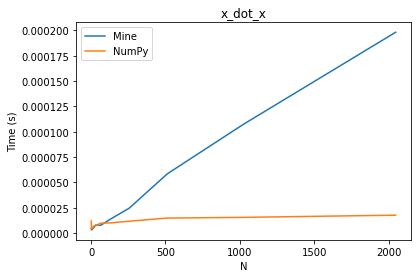

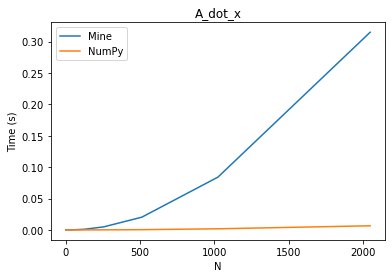

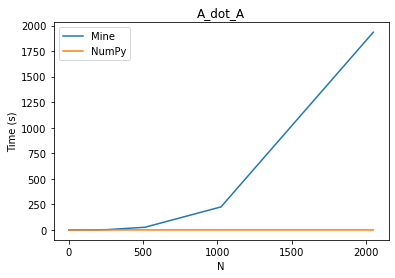

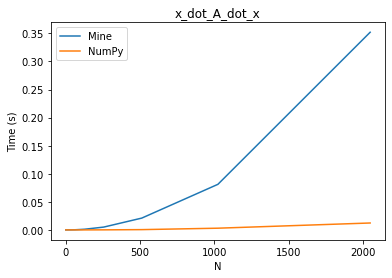

In [13]:
my_times = []
np_times = []
dim = [2**i for i in range(12)]
for d in dim:
    results, np_results = run_analysis_at_dim(d, 1)
    my_times.append(results)
    np_times.append(np_results)

my_table = [list(i) for i in zip(*my_times)]
func_names = ["x_dot_x", "A_dot_x", "A_dot_A", "x_dot_A_dot_x"]
np_table = [list(i) for i in zip(*np_times)]

for my_t, np_t, name in  zip(my_table, np_table, func_names):
    plt.plot(dim, my_t, label="Mine")
    plt.plot(dim, np_t, label="NumPy")
    plt.title(name)
    plt.legend()
    plt.xlabel("N")
    plt.ylabel("Time (s)")
    plt.show()

Present your results in a clear and understandable form. Make sure all features you refer to in the discussion below can easily be identified.

## Interpretation (7 points)

Base your answers to the following questions on your implementation and measurements above. Explain your reasoning. Refer to the plot(s) and other results where appropriate.

How do the runtimes of the implementation in pure Python and numpy compare? Can you explain the differences?

NumPy is consistently faster. This is due to NumPy using compiled code rather than using pure python code. This avoids the interpreting step performed by python

Based on the plot(s) from the previous part, compare the computational complexity of the different matrix operations. Do the results agree with your expectations?

The dot product has time complexity $\mathcal{O}(n)$ which can be seen in its linear shape.
The multiplication of a matrix and a vector has time complexity $\mathcal{O}(n^2)$ ans this can be seen by the parabolic shape of the `A_dot_x()` function.
Since matrix multiplication in `A_dot_A()` involves a matrix of dimension $n$ then we increase the complexity of `A_dot_x()` by a factor of $n$.
This can be seen with a large increase in time taken.
The similar shape of the plots for `A_dot_x()` and `x_dot_A_dot_x()` is expected since they both have the same complexity $\mathcal{O}(n^2)$.

How many floating point operations per second do the algorithms achieve? It is sufficient to quote a few examples.

On which hardware did you execute the tests? Are your results in line with the FLOPS of your computer?

In [45]:
N = 10**7
x = gen_vector(N).tolist()
t = time_func(3, x_dot_x, x)
ops = N + (N - 1)
print(f"x_dot_x: {ops/t:e} FLOPS")

N = 10**7
x = gen_vector(N)
t = time_func(3, lambda x: np.dot(x,x), x)
ops = N + (N - 1)
print(f"numpy x_dot_x: {ops/t:e} FLOPS")

N = 1000
x = gen_vector(N).tolist()
A = gen_matrix(N).tolist()
t = time_func(3, A_dot_x, A, x)
ops = N * (N + (N - 1))
print(f"A_dot_x: {ops/t:e} FLOPS")

N = 10
A = gen_matrix(N).tolist()
t = time_func(3, A_dot_A, A)
ops = N * (N * (N + (N - 1)))
print(f"A_dot_A: {ops/t:e} FLOPS")

x_dot_x: 2.168914e+07 FLOPS
numpy x_dot_x: 4.537489e+09 FLOPS
A_dot_x: 2.516900e+07 FLOPS
A_dot_A: 6.953907e+06 FLOPS


This shows the estimated number of floating point operations performed by my laptop.
My laptop has a Intel i7-8550u which runs at regular clock of 1.6Ghz with a boost clock of 4.0Ghz. Let's assume that the laptop doesn't boost.

$\text{Floating Point operations per second} = 16 \text{ Floating Point operations per cycle} \times 1.6 \text{Ghz per core} = 1.6 \times 10^{10} \text{FLOPS}$

You can see that the use of compiled lower level languages with NumPy provides a closer performance to what would be expected at the peak of processor performance while the overhead of using Python reduces the performance by a few orders of magnitude.